# Task 2.2 Visualize Quantum Measurements

There are different  ways to visualize measurments using Qiskit, it is important to use proper visualizations to represnt the results accuratley

More information can be found in 
https://quantum.cloud.ibm.com/docs/en/api/qiskit/visualization


## Objective 1: Measurement Result Visualizations

Qiskit provides comprehensive visualization tools for analyzing quantum measurement results and quantum states.

### Basic Histogram Plotting

`plot_histogram` is the most common visualization for quantum measurement results, showing the frequency distribution of measurement outcomes.

In [ ]:
from qiskit.visualization import plot_histogram
 
# Simulated measurement results from quantum circuits
counts1 = {'00': 499, '11': 501}  # First execution: nearly equal distribution
counts2 = {'00': 511, '11': 489}  # Second execution: slight bias toward |00⟩
 
data = [counts1, counts2]
plot_histogram(data)

# This shows the probability distribution of measuring |00⟩ and |11⟩ states
# from two different circuit executions

### Customized Histogram Visualization

Common customization parameters for histograms:
- `title`: Chart title
- `figsize`: Figure dimensions (width, height) in inches
- `legend`: Labels for different data series
- `color`: Custom colors for each data series
- `filename(str)`: file path to save image

In [ ]:
legend = ['First execution', 'Second execution']
title = 'Bell State Measurement Results'
figsize = (5, 3)
color = ['crimson', 'midnightblue']

plot_histogram(data, 
               legend=legend, 
               title=title, 
               figsize=figsize, 
               color=color)

# Customizations make plots more informative for presentations and publications

### Types of Quantum Visualizations

#### Basic Counts Visualization

- `plot_histogram`: Bar chart of measurement outcome frequencies

In [ ]:
from qiskit.visualization import plot_histogram
 
# Ideal Bell state measurement results
counts = {"00": 501, "11": 499}
plot_histogram(counts)

# This represents near-perfect Bell state (|00⟩ + |11⟩)/√2 measurements
# with approximately equal probability for |00⟩ and |11⟩ outcomes

- `plot_distribution`: Probability distribution visualization

In [ ]:
from qiskit.visualization import plot_distribution
counts_data = {
    '00': 245,
    '01': 125,
    '10': 130,
    '11': 500
}

plot_distribution(counts_data, 
                       title="Measurement Outcome Distribution",
                       figsize=(8, 5),
                       color='teal',
                       sort='asc')

Multiple Distributions can be plotted also.

In [ ]:
# Multiple distributions for comparison
counts_comparison = [
    {'00': 285, '01': 205, '10': 245, '11': 265},  # First experiment
    {'00': 400, '01': 150, '10': 200, '11': 250},  # Second experiment
    {'00': 350, '01': 200, '10': 220, '11': 230}   # Third experiment
]

plot_distribution(counts_comparison,
                       title="Multiple Experiment Comparison",
                       legend=['Run 1', 'Run 2', 'Run 3'],
                       figsize=(10, 6),
                       color=['#1f77b4', '#ffff0e', "#a02c49"],
                       bar_labels=True)

#### Quantum States Visualization

- `plot_bloch_vector`: Single qubit state on Bloch sphere

In [ ]:
from qiskit.visualization import plot_bloch_vector
import numpy as np
import matplotlib.pyplot as plt

# Various single qubit states on Bloch sphere
bloch_vectors = [1/np.sqrt(2), 1/np.sqrt(2),0]
title = "XY Superposition"


plot_bloch_vector(bloch_vectors, 
                     title=title, 
                     coord_type='cartesian')  # Can also use 'spherical'

- `plot_bloch_multivector`: Multiple qubits on separate Bloch spheres

In [ ]:
from qiskit.visualization import plot_bloch_multivector
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector


qc = QuantumCircuit(3)
qc.x(0)
qc.h(1)
qc.y(2)
state = Statevector(qc)

plot_bloch_multivector(state,figsize=[2,2])


- `plot_state_city`: 3D cityscape plot of statevector amplitudes

In [ ]:
from qiskit.visualization import plot_state_city
 
qc_bell = QuantumCircuit(2)
qc_bell.h(0)
qc_bell.cx(0, 1)
state_bell = Statevector(qc_bell)

plot_state_city(state_bell, title="Quantum State City Plot")

# City plots show the magnitude of statevector or density matrix elements

- `plot_state_hinton`: Hinton diagram for density matrix visualization

In [ ]:
from qiskit.visualization import plot_state_hinton


plot_state_hinton(state_bell, 
                 title="Bell State - Hinton Diagram",
                 figsize=(8, 6))


- `plot_state_paulivec`: Pauli expectation values visualization


In [ ]:
from qiskit.visualization import plot_state_paulivec

plot_state_paulivec(state_bell,
                   title="Bell State - Pauli Expectation Values",
                   figsize=(7, 5),
                   color='green')

- `plot_state_qsphere`: Q-sphere representation of quantum states

In [ ]:
from qiskit.visualization import plot_state_qsphere

plot_state_qsphere(state_bell,figsize=(4,4))

### Other Visualization Categories

**Device Visualizations:**

- `plot_gate_map`: Physical qubit connectivity and layout


- `plot_error_map`: Quantum error rates across device

In [ ]:
from qiskit.visualization import plot_error_map
from qiskit.providers.fake_provider import GenericBackendV2
 
backend = GenericBackendV2(num_qubits=3)
plot_error_map(backend)


- `plot_circuit_layout`: How circuits map to physical hardware

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit.visualization import plot_circuit_layout
 
qc_ghz = QuantumCircuit(3, 3)
qc_ghz.h(0)
qc_ghz.cx(0,1)
qc_ghz.cx(0,2)
qc_ghz.measure_all()
 
backend = GenericBackendV2(num_qubits=7)
qc_ghz_optimized = transpile(qc_ghz, backend=backend, optimization_level=3)
plot_circuit_layout(qc_ghz_optimized, backend)

- `plot_coupling_map`: Qubit connectivity graph

In [ ]:
from qiskit.visualization import plot_coupling_map
 
num_qubits = 8
qubit_coordinates = [[0, 1], [1, 1], [1, 0], [1, 2], [2, 0], [2, 2], [2, 1], [3, 1]]
coupling_map = [[0, 1], [1, 2], [2, 3], [3, 5], [4, 5], [5, 6], [2, 4], [6, 7]]
plot_coupling_map(num_qubits, qubit_coordinates, coupling_map)


**Circuit Visualizations:**

- `circuit_drawer`: Quantum circuit diagrams

In [ ]:
from qiskit.visualization import circuit_drawer
 
# Using the functional interface for circuit drawing
print("Using circuit_drawer function directly:")
circuit_drawer(qc_ghz, output="mpl")


**DAG Visualizations:**
- `dag_drawer`: Directed Acyclic Graph representation

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.converters import circuit_to_dag
from qiskit.visualization import dag_drawer
 
qc = QuantumCircuit(3,3)
qc.h(0)
qc.cx(0, 1)
qc.measure(0, 0)
qc.measure(1, 1)
 
dag = circuit_to_dag(qc)
 
 
dag_drawer(dag)


**Pass Manager Visualizations:**
- `pass_manager_drawer`: Compilation pass sequences

**Timeline Visualizations:**
- `timeline_drawer`: Quantum operation scheduling

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization.timeline import draw
from qiskit.providers.fake_provider import GenericBackendV2
 
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
 
backend = GenericBackendV2(5)
 
qc = transpile(qc, backend, layout_method='trivial')
draw(qc, target=backend.target)


**Single Qubit State Transitions:**
- `visualize_transition`: Animated Bloch sphere transitions

**Array/Matrix Visualizations:**
- `array_to_latex`: Convert arrays to LaTeX format

## Objective 3: Gate Map Visualization

Gate map visualization shows the physical layout and connectivity of quantum processors

In [ ]:
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit.visualization import plot_gate_map
 
# Create a simulated quantum backend with 5 qubits
backend = GenericBackendV2(num_qubits=5)
 
# Visualize the gate map (qubit connectivity)
plot_gate_map(backend, figsize=[3, 3])

---

## Practice Questions

**1)Which Qiskit function is most appropriate for visualizing a statevector on a Bloch-sphere–like representation of all computational basis states?**

A) plot_bloch_vector()

B) plot_histogram()

C) plot_state_qsphere()

D) plot_state_city()


***Answer:***
<Details>
<br/>
C) plot_state_qsphere is used to visualize global structure of multi-qubit states
</Details>

---

**2) Which of the following diagrams BEST represents the output of this code?**

```
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)

state = Statevector(qc)
plot_bloch_multivector(state)
```

A) Qubit 0: ●──H──

   Qubit 1: ●──X──

B) 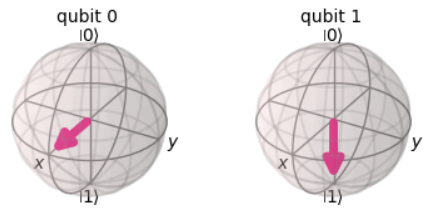

C) 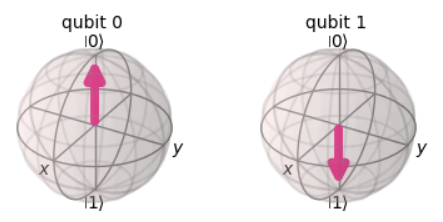

D) 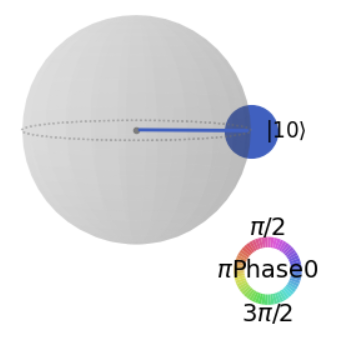




***Answer:***
<Details>
<br/>
B) H(0) → superposition, X(0) → |1⟩
</Details>